# Predict Birds

In [1]:
import numpy as np
from utils import load_dataset, model, predict
from PIL import Image


### Step 1: Load Data


In [2]:
# load data bird and non-bird
train_set_x_orig, train_set_y, test_set_x_orig, test_set_y, classes = load_dataset("./datasets/", 42)

y = [1], it's a 'bird' picture.


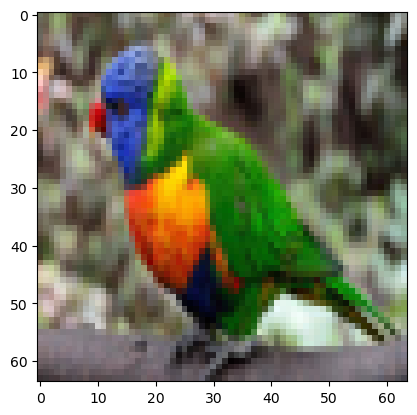

In [3]:
# Example of a picture
import matplotlib.pyplot as plt

index = 3
plt.imshow(train_set_x_orig[index])
print ("y = " + str(train_set_y[:, index]) + ", it's a '" + classes[np.squeeze(train_set_y[:, index])] +  "' picture.")

#### Lets look at the shape of the data

In [4]:
print ("train_set_x shape: " + str(train_set_x_orig.shape))
print ("train_set_y shape: " + str(train_set_y.shape))
print ("test_set_x shape: " + str(test_set_x_orig.shape))
print ("test_set_y shape: " + str(test_set_y.shape) + "\n")

m_train = train_set_x_orig.shape[0]
m_test = test_set_x_orig.shape[0]
num_px = train_set_x_orig.shape[1]

print ("Number of training examples: m_train = " + str(m_train))
print ("Number of testing examples: m_test = " + str(m_test))
print ("Height/Width of each image: num_px = " + str(num_px))
print ("Each image is of size: (" + str(num_px) + ", " + str(num_px) + ", 3)")


train_set_x shape: (411, 64, 64, 3)
train_set_y shape: (1, 411)
test_set_x shape: (104, 64, 64, 3)
test_set_y shape: (1, 104)

Number of training examples: m_train = 411
Number of testing examples: m_test = 104
Height/Width of each image: num_px = 64
Each image is of size: (64, 64, 3)


### 2. Prep Data

In [5]:
# Flatten the training and test images
train_set_x_flatten = train_set_x_orig.reshape(train_set_x_orig.shape[0], -1).T
test_set_x_flatten = test_set_x_orig.reshape(test_set_x_orig.shape[0], -1).T

print ("train_set_x_flatten shape: " + str(train_set_x_flatten.shape))
print ("train_set_y shape: " + str(train_set_y.shape))
print ("test_set_x_flatten shape: " + str(test_set_x_flatten.shape))
print ("test_set_y shape: " + str(test_set_y.shape))

# Standardize data to have feature values between 0 and 1.
train_set_x = train_set_x_flatten / 255.
test_set_x = test_set_x_flatten / 255.

train_set_x_flatten shape: (12288, 411)
train_set_y shape: (1, 411)
test_set_x_flatten shape: (12288, 104)
test_set_y shape: (1, 104)


### 3. Train our model

In [6]:
# p = model(train_set_x, train_set_y, test_set_x, test_set_y)
logistic_regression_model = model(train_set_x, train_set_y, test_set_x, test_set_y, num_iterations=2000, learning_rate=0.005, print_cost=True)

Cost after iteration 0: 0.693147
Cost after iteration 100: 0.393776
Cost after iteration 200: 0.338831
Cost after iteration 300: 0.305161
Cost after iteration 400: 0.280106
Cost after iteration 500: 0.259892
Cost after iteration 600: 0.242890
Cost after iteration 700: 0.228231
Cost after iteration 800: 0.215383
Cost after iteration 900: 0.203988
Cost after iteration 1000: 0.193786
Cost after iteration 1100: 0.184584
Cost after iteration 1200: 0.176231
Cost after iteration 1300: 0.168608
Cost after iteration 1400: 0.161616
Cost after iteration 1500: 0.155178
Cost after iteration 1600: 0.149227
Cost after iteration 1700: 0.143709
Cost after iteration 1800: 0.138576
Cost after iteration 1900: 0.133788
train accuracy: 97.81021897810218 %
test accuracy: 88.46153846153847 %


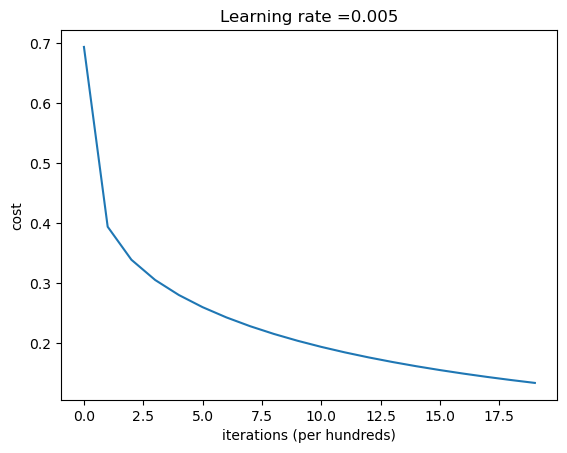

In [7]:
# Plot learning curve (with costs)
costs = np.squeeze(logistic_regression_model['costs'])
plt.plot(costs)
plt.ylabel('cost')
plt.xlabel('iterations (per hundreds)')
plt.title("Learning rate =" + str(logistic_regression_model["learning_rate"]))
plt.show()

### Testing this thing baby!

w shape: (12288, 1)
b shape: ()
X shape: (12288, 1)
A[0, 0]: 0.9914385016892288
y = 1.0, your algorithm predicts a "bird" picture.


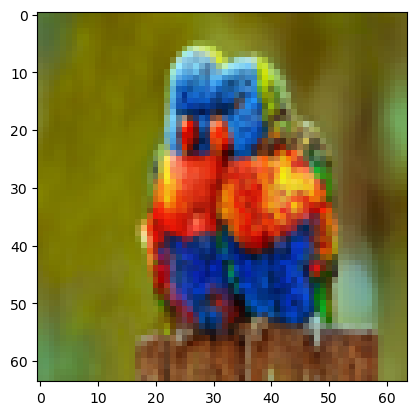

In [8]:
# change this to the name of your image file
my_image = "./bird.jpg"   

# We preprocess the image to fit your algorithm.
fname = my_image
image = np.array(Image.open(fname).resize((num_px, num_px)))
plt.imshow(image)
image = image / 255.
image = image.reshape((1, num_px * num_px * 3)).T
my_predicted_image = predict(logistic_regression_model["w"], logistic_regression_model["b"], image, print_info=True)

print("y = " + str(np.squeeze(my_predicted_image)) + ", your algorithm predicts a \"" + classes[int(np.squeeze(my_predicted_image)),] +  "\" picture.")

Training a model with learning rate: 0.01

-------------------------------------------------------

Training a model with learning rate: 0.001

-------------------------------------------------------

Training a model with learning rate: 0.0001

-------------------------------------------------------



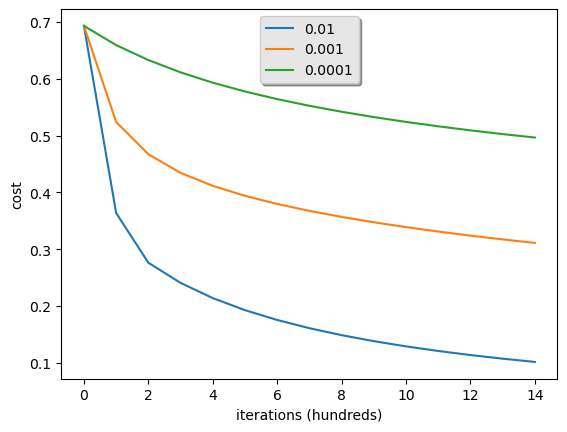

In [9]:
learning_rates = [0.01, 0.001, 0.0001]
models = {}

for lr in learning_rates:
    print ("Training a model with learning rate: " + str(lr))
    models[str(lr)] = model(train_set_x, train_set_y, test_set_x, test_set_y, num_iterations=1500, learning_rate=lr, print_cost=False)
    print ('\n' + "-------------------------------------------------------" + '\n')

for lr in learning_rates:
    plt.plot(np.squeeze(models[str(lr)]["costs"]), label=str(models[str(lr)]["learning_rate"]))

plt.ylabel('cost')
plt.xlabel('iterations (hundreds)')

legend = plt.legend(loc='upper center', shadow=True)
frame = legend.get_frame()
frame.set_facecolor('0.90')
plt.show()

w shape: (12288, 1)
b shape: ()
X shape: (12288, 1)
A[0, 0]: 0.6745149347992887
y = 1.0, your algorithm predicts a "bird" picture.


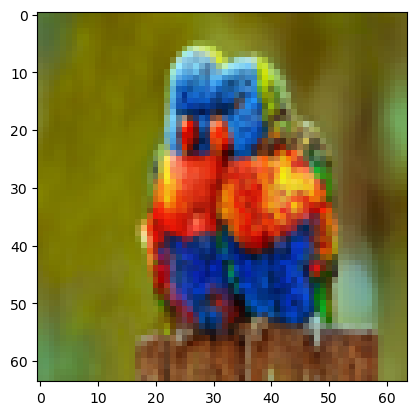

In [16]:
logistic_regression_model = models["0.0001"]

# change this to the name of your image file
my_image = "./bird.jpg"   

# We preprocess the image to fit your algorithm.
fname = my_image
image = np.array(Image.open(fname).resize((num_px, num_px)))
plt.imshow(image)
image = image / 255.
image = image.reshape((1, num_px * num_px * 3)).T
my_predicted_image = predict(logistic_regression_model["w"], logistic_regression_model["b"], image, print_info=True)

print("y = " + str(np.squeeze(my_predicted_image)) + ", your algorithm predicts a \"" + classes[int(np.squeeze(my_predicted_image)),] +  "\" picture.")